In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [68]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [69]:
df['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

In [71]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,4,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",4,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,4,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,4,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,4,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,3,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",3,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",3,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,3,Semi-Furnished,Family,2,Contact Agent


In [72]:
X = df[['Size', 'Bathroom']]
y = df[['Rent']]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train.shape

(3796, 2)

In [75]:
y_train.shape

(3796, 1)

In [76]:
X_test.shape

(950, 2)

In [77]:
y_test.shape

(950, 1)

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = model.predict(X_test)

In [80]:
y_pred

array([[ 3.88052385e+04],
       [ 3.25182988e+04],
       [ 2.66085753e+04],
       [ 7.46618887e+04],
       [ 1.45013019e+05],
       [ 3.77574152e+04],
       [ 2.88509172e+04],
       [ 3.04226522e+04],
       [ 1.23092418e+05],
       [ 2.93748289e+04],
       [ 1.90076507e+03],
       [ 2.62313590e+04],
       [ 3.67095919e+04],
       [-1.94881525e+02],
       [ 3.88052385e+04],
       [-1.94881525e+02],
       [ 1.25188065e+05],
       [ 5.04423497e+03],
       [ 4.19487084e+04],
       [ 8.19966518e+04],
       [ 4.24516636e+04],
       [-3.33835142e+03],
       [-2.29052812e+03],
       [ 4.09008851e+04],
       [ 1.61044715e+05],
       [-1.94881525e+02],
       [-1.24270482e+03],
       [ 8.19966518e+04],
       [-2.29052812e+03],
       [ 8.52941774e+02],
       [-3.33835142e+03],
       [-2.37435399e+03],
       [ 2.62313590e+04],
       [ 3.35661221e+04],
       [ 6.41836557e+04],
       [ 6.96323369e+04],
       [ 1.90076507e+03],
       [-1.24270482e+03],
       [ 3.6

In [81]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 26201.10
Mean Squared Error (MSE): 2555571983.82
R-squared (R²): 0.36


In [82]:
from sklearn.metrics import accuracy_score

In [83]:
y_pred.shape

(950, 1)

In [84]:
y_test.shape

(950, 1)

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


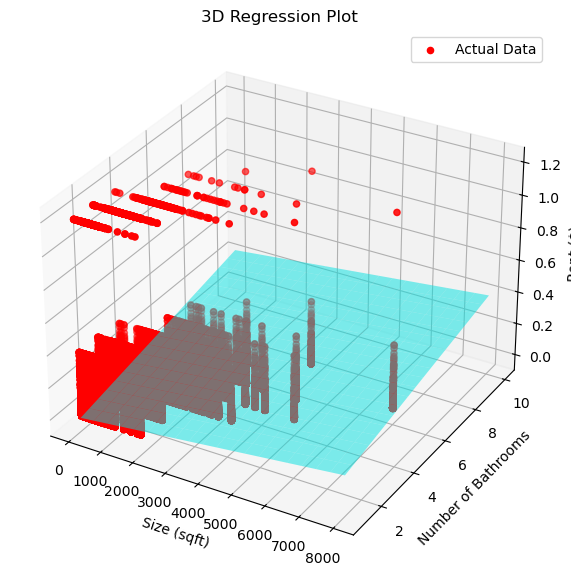

In [85]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Size'], X_test['Bathroom'], y_test, color='red', label="Actual Data")

size_range = np.linspace(X['Size'].min(), X['Size'].max(), 20)
bathroom_range = np.linspace(X['Bathroom'].min(), X['Bathroom'].max(), 20)
size_grid, bathroom_grid = np.meshgrid(size_range, bathroom_range)

rent_grid = model.predict(np.c_[size_grid.ravel(), bathroom_grid.ravel()])
rent_grid = rent_grid.reshape(size_grid.shape)

ax.plot_surface(size_grid, bathroom_grid, rent_grid, color='cyan', alpha=0.5)

ax.set_xlabel('Size (sqft)')
ax.set_ylabel('Number of Bathrooms')
ax.set_zlabel('Rent ($)')
ax.set_title('3D Regression Plot')

plt.legend()
plt.show()